# Test1 - Consumer analytics

## Chu-Chun Ku

---



# Part 1: Marketing Theory and Statistical Analysis (30 Points)

# 1.	What is “marketing myopia”, and what marketing management orientation is it associated with?  Provide an example of a company or industry that follows (or followed) this orientation, with a brief explanation. (10 points)

Ans:
- Marketing myopia refers to a situation where companies focus too much on their existing products features and fail to adapt to changing market needs and consumer preferences. It is associated with the product concept in marketing management orientation.
- The examples of “Marketing myopia” are Blackberry and Kodak. To be more specific, Blackberry was a popular company for the capable phone in the business field, but it lost its market share because it focused too much on enhancing its keyboard rather than providing a screen-touchable mobile phone.


# 2.	Compare the secondary data and primary data in terms of their advantages and disadvantages (10 points)

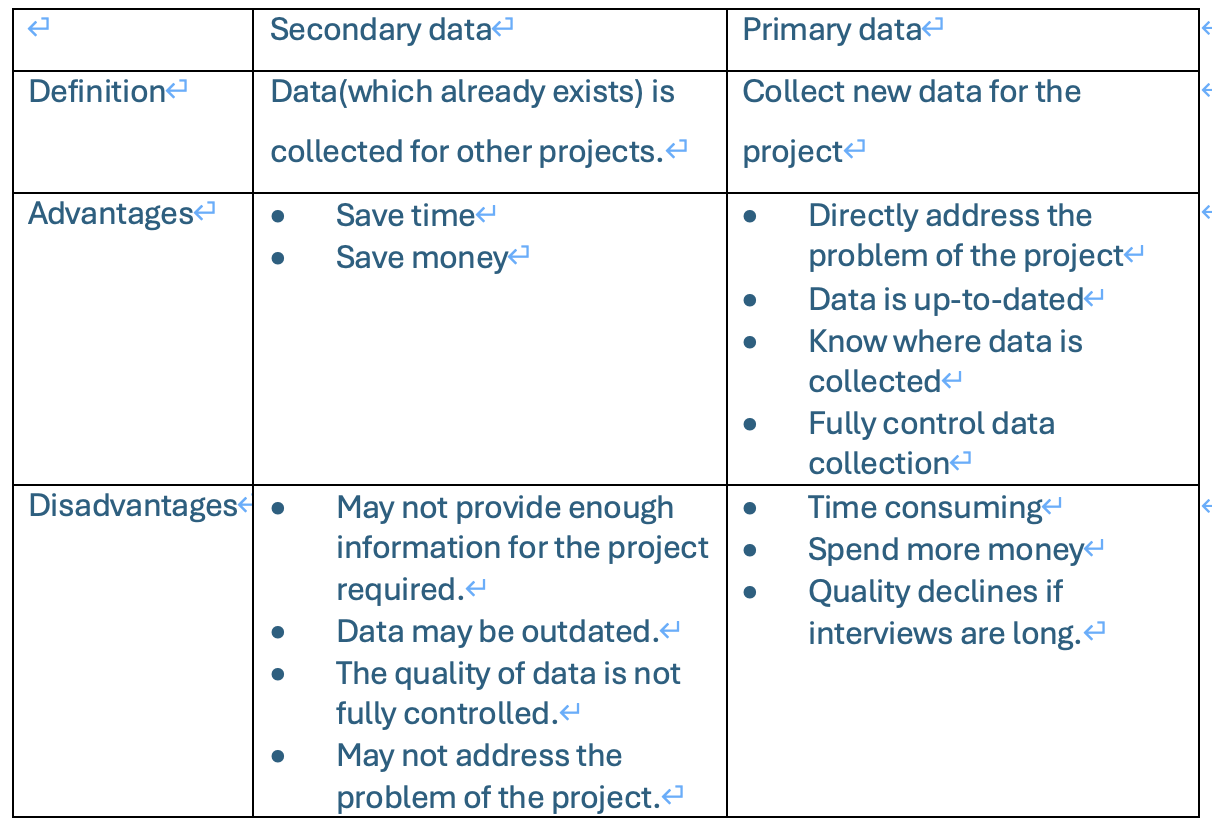

# 3.	Compare the ward’s method with k-means (10 points)

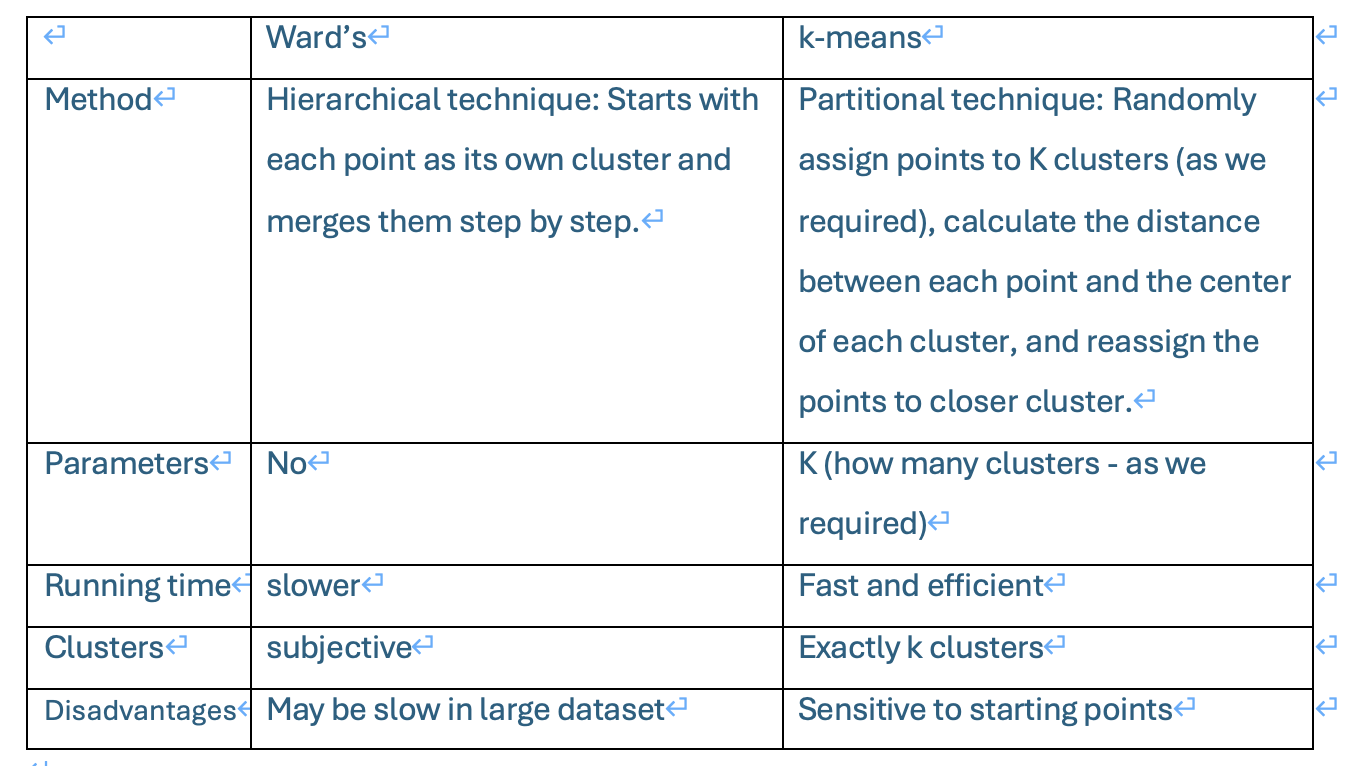



---



# Part 2 Regression and Hypothesis Testing (70 points)

In this part you will analyze a dataset containing the sales of Coca Cola for across six grocery stores in a major city in North America. The dataset has 5 columns, which are defined as follows:



* **sales**: number of units of Coca Cola sold per year and store, in thousands.
* **adv.exp**: yearly advertising expenditures for Coca Cola in millions of dollars.
* **comp.exp**: yearly advertising expenditures for Coca Cola's main competitor, Pepsi, in millions of dollars.
* **year**: the year for a given observation.
* **storename**: the name of the store where the sales were recorded



# 1.	What kind of data is it? Please justify your answers (10 points)

## Q1 Answer:
It is secondary data, and panel data.

The reasons are that
* Secondary data:
because the dataset looks like collecting from the company Coca Cola, and it is not the first-hand data collecting directly by us.
* Panel data: because the dataset includes the data from 1996 to 2016, and includes 6 different grocery stores.


## Import data & library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv("coca_cola_sales.csv")
data = data.rename(columns={"adv.exp": "adv_exp"})
data = data.rename(columns={"comp.exp": "comp_exp"})
print(data)

         sales    adv_exp  comp_exp  year storename
0    30.456389  10.429924  0.388938  1996    Longos
1    19.326500  10.828150  1.071047  1996    Sobeys
2    22.308655  11.947232  1.100496  1996   Loblaws
3    19.256390  10.544949  0.968955  1996     Metro
4     8.803837  12.176146  1.441370  1996   Farmboy
..         ...        ...       ...   ...       ...
121  18.359512   9.355124  0.224687  2016    Sobeys
122  20.415310   9.918941  0.820466  2016   Loblaws
123  18.411346  10.443273  1.331680  2016     Metro
124   8.322844  10.948848  0.887475  2016   Farmboy
125  34.002427  11.140157  1.256256  2016    Costco

[126 rows x 5 columns]


# 2.	Run a regression of revenues on advertising expenditures, and a set of dummy variables to capture the fact that the overall level of sales may be different from store to store (e.g., each dummy variable should be one if sales are recorded at a particular store, similar to the dummy variables for different physician types in the detailing example from class). Write down your regression specification and provide an interpretation of the coefficients of the dummy variables, as well as of the coefficient of advertising. (20 points)

## Q2 Answer
## Interpretation of the coefficients
* intercept: The intercept (21.4324) represents the yearly sales in the store Costco, which is 21 thousands units when the advertising expenditure is zero, as Costco is the baseline.
* adv_exp: the coefficient of adv_exp is 1.1465, representing when increase $1 M in advertising expenditures, the sales will increase by 1.1465 thousands units on average across all stores.
* storename_Farmboy:  the storename_Farmboy of coefficients is -25.6362, which means under the same advertising expenditure, Farmboy has less sales units than Costco, which is negative 25.7 thousands units.
* storename_Loblaws = -12.4588, under the same advertising expenditure, Loblaws has less sales units than Costco, which is negative 12.5 thousands units.
* storename_Longos = -3.1579, under the same advertising expenditure, Longos has less sales units than Costco, which is negative 3 thousands units.
* storename_Metro = -14.2139, under the same advertising expenditure, Metro  has less sales units than Costco, which is negative 14 thousands units.
* storename_Sobeys = -14.3302, under the same advertising expenditure, Sobeys has less sales units than Costco, which is negative 14 thousands units.

* Statistical Significance: Since the p-values for all coefficients are below 0.05, we reject the null hypothesis (H0). This indicates that the results are statistically significant.

In [12]:
data1 = pd.get_dummies(data, columns=['storename'], drop_first=True)
data1
# 6 stores = Costco, storename_Farmboy, storename_Loblaws, storename_Longos, storename_Metro, storename_Sobeys

,sales,adv_exp,comp_exp,year,storename_Farmboy,storename_Loblaws,storename_Longos,storename_Metro,storename_Sobeys
0,30.456389,10.429924,0.388938,1996,False,False,True,False,False
1,19.326500,10.828150,1.071047,1996,False,False,False,False,True
2,22.308655,11.947232,1.100496,1996,False,True,False,False,False
3,19.256390,10.544949,0.968955,1996,False,False,False,True,False
4,8.803837,12.176146,1.441370,1996,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
121,18.359512,9.355124,0.224687,2016,False,False,False,False,True
122,20.415310,9.918941,0.820466,2016,False,True,False,False,False
123,18.411346,10.443273,1.331680,2016,False,False,False,True,False
124,8.322844,10.948848,0.887475,2016,True,False,False,False,False


In [13]:
q2 = ols("sales ~ adv_exp + storename_Farmboy + storename_Loblaws + storename_Longos + storename_Metro + storename_Sobeys", data=data1).fit()
print(q2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5163.
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          2.78e-141
Time:                        01:41:52   Log-Likelihood:                -95.043
No. Observations:                 126   AIC:                             204.1
Df Residuals:                     119   BIC:                             223.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# 3.	 Now, take the regression from question 2, and add Pepsi's advertising expenditures to it. What happens to the coefficient on Coke's advertising expenditure, and why? (10 points)

## Q3 Answer
When the model includes Pepsi's advertising expenditures, we observe the following changes:

* The coefficient of Coca Cola's advertising expenditure increases (from 1.1465 to 1.3931), representing that after considerating for the impact of a competitor's advertising expenditure, the effect of Coca Cola’s advertising expenditure is estimated more accurately and becomes bigger.

* The intercept decreases (from 21.4324 to 19.4009), meaning that when both Coca Cola and Pepsi's advertising expenditures are zero, Costco's annual sales is lower.
* Pepsi's advertising expenditure has a negative coefficient of -0.8295, meaning that when Pepsi increases its advertising expenditures by $1M, Coca Cola’s annual sales units in the six stores decrease by an average of 0.8 thousand units, showing the competitive effects in the market.
* The relative sales differences between stores remain almost unchanged, indicating that Pepsi's advertising mainly affects Coca Cola’s overall sales rather than altering the relative sales across different stores.
* Statistical Significance: Since the p-values for all coefficients are below 0.05, we reject the null hypothesis (H0). This indicates that the results are statistically significant.

In [ ]:
q3 = ols("sales ~ adv_exp + comp_exp + storename_Farmboy + storename_Loblaws + storename_Longos + storename_Metro + storename_Sobeys", data=data1).fit()
print(q3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6094.
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          8.60e-148
Time:                        20:11:45   Log-Likelihood:                -74.424
No. Observations:                 126   AIC:                             164.8
Df Residuals:                     118   BIC:                             187.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# 4.	 Create a regression specification that allows the effect of coca-cola’s advertising to be different for different stores. Write down your regression specification and provide an interpretation for the new coefficients you added? (20 points)

## Q4 Answer
Considering the impact of Pepsi's advertising expenditure, this step adds the interaction terms between Coca-Cola's advertising expenditure and different stores. The benchmark store is Costco, meaning that adv_exp represents the effect of advertising expenditure at Costco, while the interaction terms indicate the relative effect of advertising expenditure compared to Costco with each store.

* adv_exp:storename[T.Farmboy] = -1.2495: This indicates that the effect of advertising expenditure on Farmboy is weaker than that on Costco. Advertising expenditure leads to 1.25 thousand **less** sales units per $1M at Farmboy compared to Costco.

* adv_exp:storename[T.Loblaws] = -0.7871: This indicates that the effect of advertising expenditure on Loblaws is weaker than that on Costco. Advertising expenditure leads to 0.79 thousand **less** sales units per $1M at Loblaws compared to Costco.

* adv_exp:storename[T.Longos] = 0.6621: This indicates that the effect of advertising expenditure on Longos is stronger than that on Costco. Advertising leads to 0.66 thousand **more** sales units per $1M at Longos compared to Costco.

* adv_exp:storename[T.Metro] = -0.3943: This indicates that the effect of advertising expenditure on Metro is weaker than that on Costco. Advertising expenditure leads to 0.39 thousand **less** sales units per $1M at Metro compared to Costco.

* adv_exp:storename[T.Sobeys] = -0.8896: This indicates that the effect of advertising expenditure on Sobeys is weaker than that on Costco. Advertising expenditure leads to 0.89 thousand **less** sales units per $1M at Sobeys compared to Costco.

* Statistical Significance: Since the p-values for all coefficients are below 0.05, we reject the null hypothesis (H0). This indicates that the results are statistically significant.

In [ ]:
q4 = ols("sales ~ adv_exp * storename + comp_exp", data=data).fit()
print(q4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.300e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          2.33e-185
Time:                        23:30:32   Log-Likelihood:                 45.795
No. Observations:                 126   AIC:                            -65.59
Df Residuals:                     113   BIC:                            -28.72
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# 5. Compute the mean level of advertising expenditures at each store. Given your findings in questions 3 and 4, do you think that Coca Cola is optimizing its advertising expenditures? Why or why not? (10 points)
Hint: there are a couple of ways you can compute the mean expenditures across the stores. One approach is to use the filter function to select subsets of the data. An alternative is to use the group_by and summarize commands.

## Q5 Answer

Based on the observations from Q3 and Q4, comparing the average advertising expenditure across different stores, **I think that Coca-Cola has not optimized its advertising spend across stores**.

The reason is that Longos has the highest advertising effectiveness (coefficient = 0.6621), which means that for every additional unit of advertising spend at Longos, sales increase by an additional 0.6621 thousand units compared to Costco.

However, Longos receives the lowest average advertising expenditure among all stores, suggesting that advertising budget allocation may not be optimized based on advertising effectiveness. In other words, if Coca-Cola were optimizing its advertising expenditure across stores, it would logically allocate more advertising budget to Longos.

In [ ]:
store_adv_summary = data.groupby("storename")["adv_exp"].mean().reset_index()
print(store_adv_summary)


  storename    adv_exp
0    Costco  10.700098
1   Farmboy  10.836703
2   Loblaws  10.801973
3    Longos  10.442998
4     Metro  10.456183
5    Sobeys  10.676758
